In [1]:
library(loadeR)
library(visualizeR)
library(convertR)

Loading required package: rJava



Loading required package: loadeR.java



Java version 11x amd64 by Azul Systems, Inc. detected



NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



Loading required package: climate4R.UDG



climate4R.UDG version 0.2.3 (2021-07-05) is loaded



Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>



Please use 'citation("climate4R.UDG")' to cite this package.



loadeR version 1.7.1 (2021-07-05) is loaded



Please use 'citation("loadeR")' to cite this package.



Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded



Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>



Please see 'citation("transformeR")' to cite this package.



visualizeR version 1.6.1 (2021-03-11) is loaded



Please see 'citation("visualizeR")' to cite this package.



Loading required package: udunits2



udunits system database read from /home/phanaur/mambaforge/envs/tfg/share/udunits/udunits2.xml



convertR version 0.2.0 (2020-02-22) is loaded



  More information about the 'climate4R' ecosystem in: http://meteo.unican.es/climate4R




Attaching package: ‘convertR’




The following objects are masked from ‘package:loadeR’:

    hurs2huss, huss2hurs, tdps2hurs




In [2]:
# global reference 1º land/sea mask
mask <- loadGridData("../reference-grids/land_sea_mask_1degree.nc4", var = "sftlf")

[2023-01-18 09:45:59] Defining geo-location parameters



[2023-01-18 09:45:59] Defining time selection parameters



NOTE: Undefined Dataset Time Axis (static variable)



[2023-01-18 09:45:59] Retrieving data subset ...



[2023-01-18 09:45:59] Done



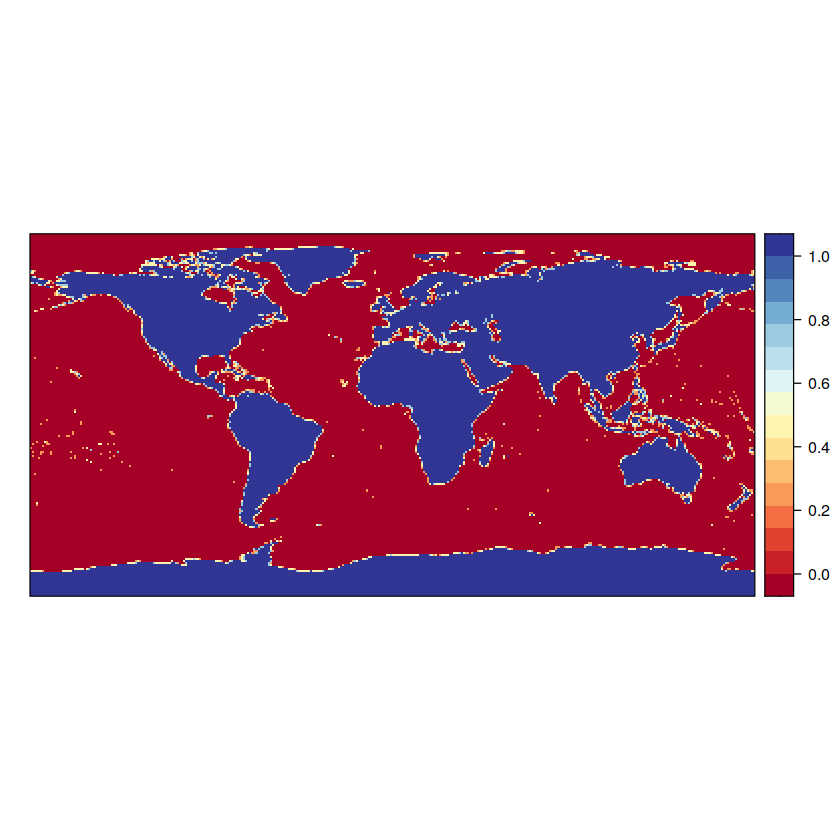

In [3]:
# plotting mask
spatialPlot(mask)

In [4]:
# loading global mean temperature
tas <- loadGridData("auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc", 
                    var = "tas", years = 2000:2010) 

[2023-01-18 09:46:03] Defining geo-location parameters



[2023-01-18 09:46:03] Defining time selection parameters



[2023-01-18 09:46:03] Retrieving data subset ...



[2023-01-18 09:46:03] Done



[2023-01-18 09:46:03] - Computing climatology...



[2023-01-18 09:46:03] - Done.



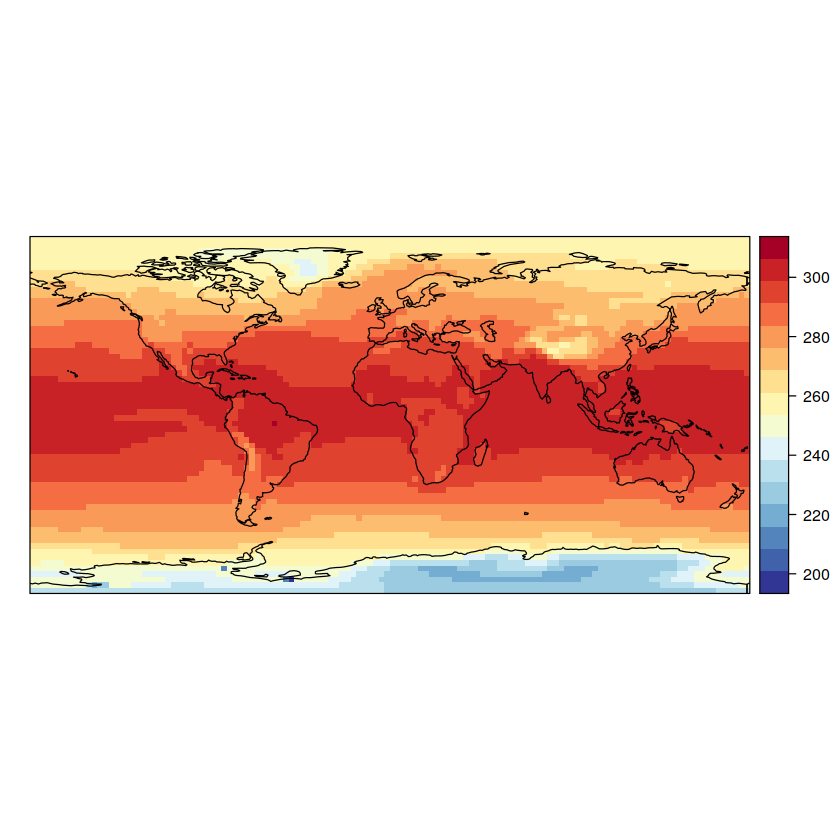

In [5]:
# plotting climatology
spatialPlot(climatology(tas), backdrop.theme = "coastline", rev.colors = TRUE)

In [6]:
attributes(getGrid(tas))$resX
attributes(getGrid(tas))$resY

[1] 2.8125

[1] 2.789327

In [7]:
# Note: This cell may take a while to run 
tas.i <- interpGrid(tas, getGrid(mask), method = "bilinear")

Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new longitudes are outside the data extent”


Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new latitudes are outside the data extent”


[2023-01-18 09:46:04] Performing bilinear interpolation... may take a while



[2023-01-18 09:46:09] Done



In [8]:
attributes(getGrid(tas.i))$resX
attributes(getGrid(tas.i))$resY

[1] 1

[1] 1

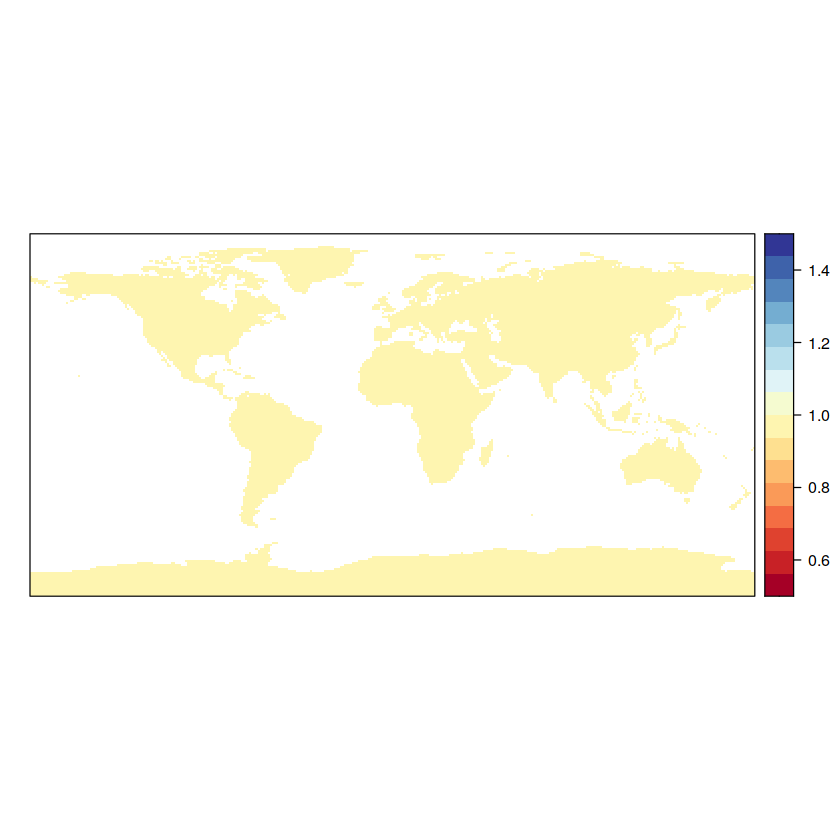

In [9]:
# binary 1º land/sea mask
land <- binaryGrid(mask, condition = "GT", threshold = 0.999, values = c(NA, 1))
spatialPlot(land)

In [10]:
masktimes <- rep(list(land), getShape(tas.i, "time"))
mask2apply <- bindGrid(masktimes, dimension = "time")

Warning message in value[[3L]](cond):
“time dimension could not be sorted!”


[2023-01-18 09:46:13] - Computing climatology...



[2023-01-18 09:46:13] - Done.



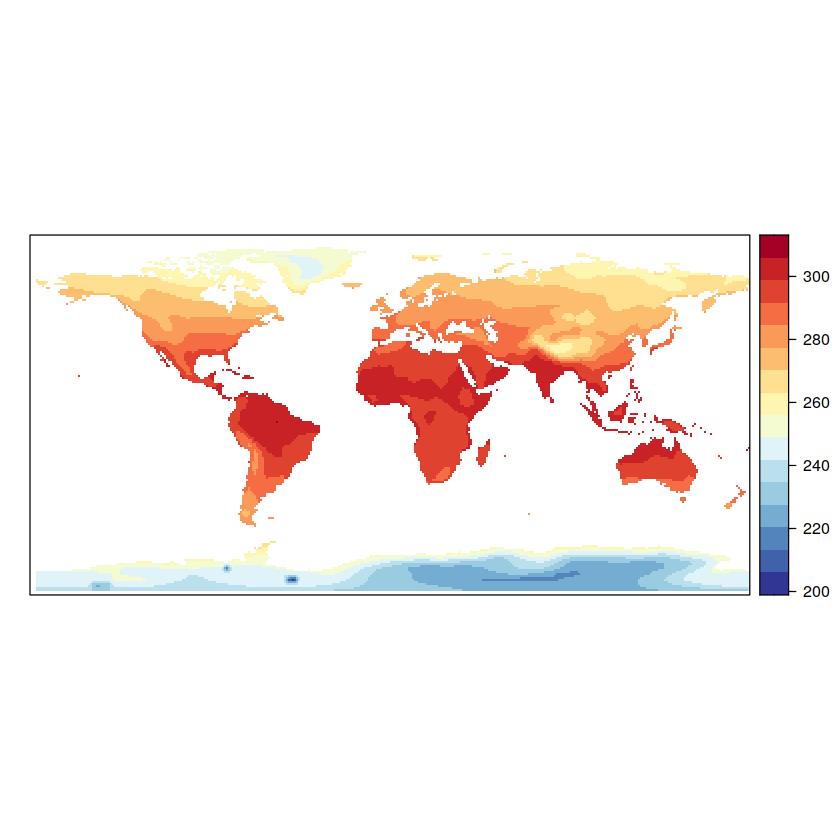

In [11]:
tas.i.land <- gridArithmetics(tas.i, mask2apply, operator = "*")

# final land-only temperature data
spatialPlot(climatology(tas.i.land), rev.colors = TRUE)  

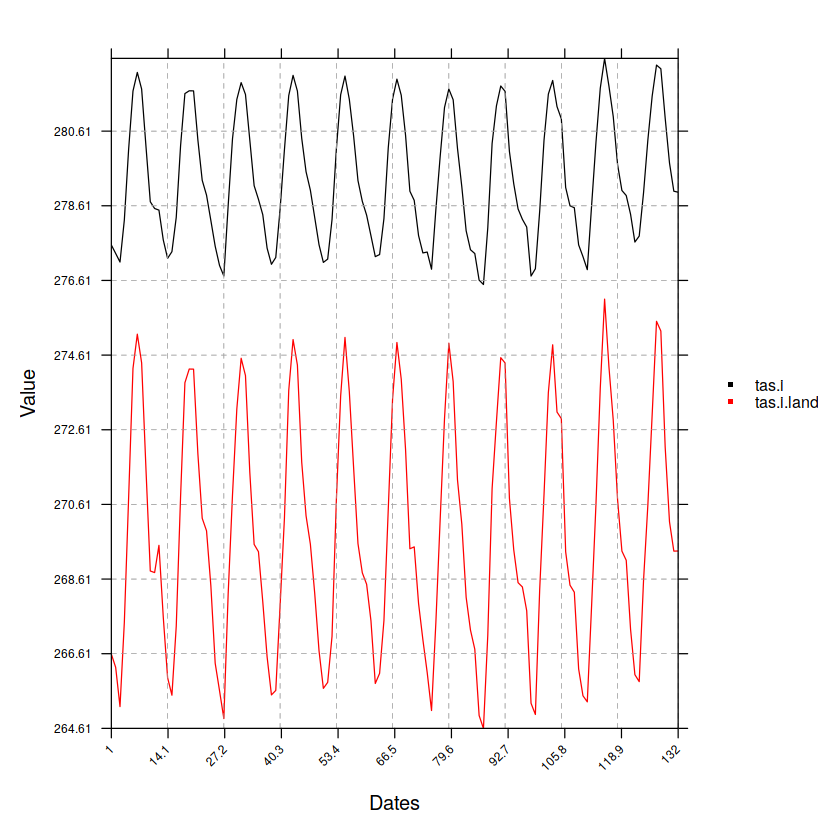

In [12]:
# monthly time-series (in K)
temporalPlot(tas.i, tas.i.land, x.axis = "index")

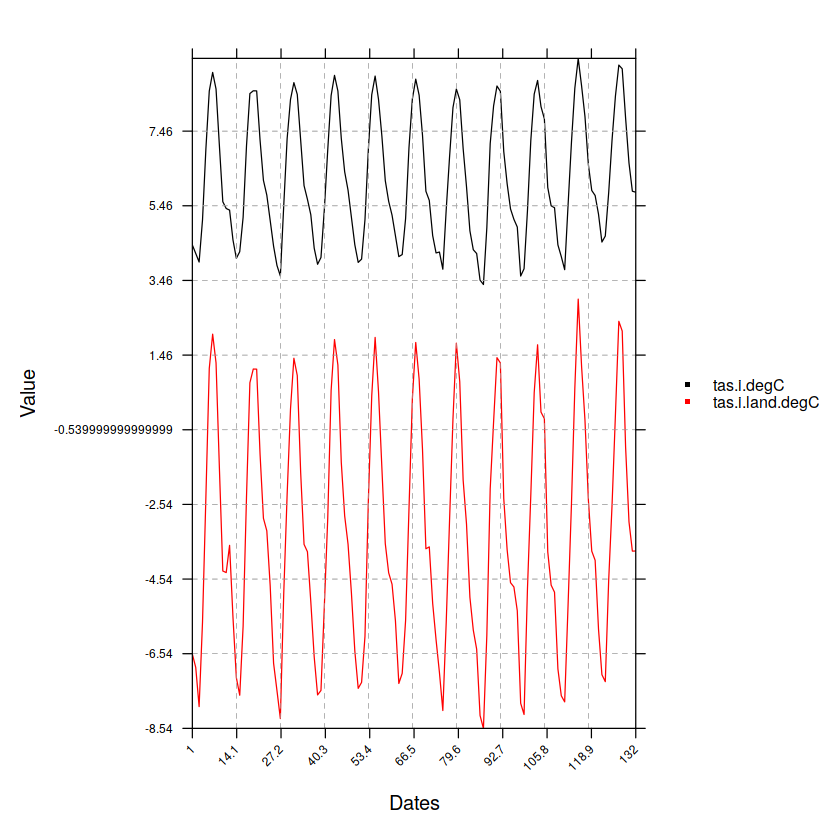

In [13]:
# monthly time-series (in Celsius degrees)
tas.i.degC <- udConvertGrid(tas.i, new.units = "degC")
tas.i.land.degC <- udConvertGrid(tas.i.land, new.units = "degC")
temporalPlot(tas.i.degC, tas.i.land.degC, x.axis = "index")

In [14]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Fedora Linux 37 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /home/phanaur/mambaforge/envs/tfg/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=es_ES.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=es_ES.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=es_ES.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] convertR_0.2.0      udunits2_0.13       visualizeR_1.6.1   
[4] transformeR_2.1.3   loadeR_1.7.1        climate4R.UDG_0.2.3
[7] loadeR.java_1.1.1   rJava_1.0-4        

loaded via a namespace (and not attached):
 [1] viridis_0.6.1           maps_3